In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('/content/weather_data.csv')
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
110785,Phoenix,2024-02-13 21:23:21,-4.737941,50.340262,2.153194,21.656110
110786,San Antonio,2024-03-05 06:49:51,30.106470,80.483258,3.502326,1.123876
110787,New York,2024-02-17 05:57:41,28.760766,36.743516,7.750239,3.240235
110788,New York,2024-02-22 09:15:17,4.480796,39.473322,4.575836,9.494012


dataset has 110,790 rows and 6 columns

       Location            Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia  2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio  2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110790 entries, 0 to 110789
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          110790 non-null  object 
 1   Date_Time         110790 non-null  object 
 2   Temperature_C     110790 non-null  float64
 3   Hu

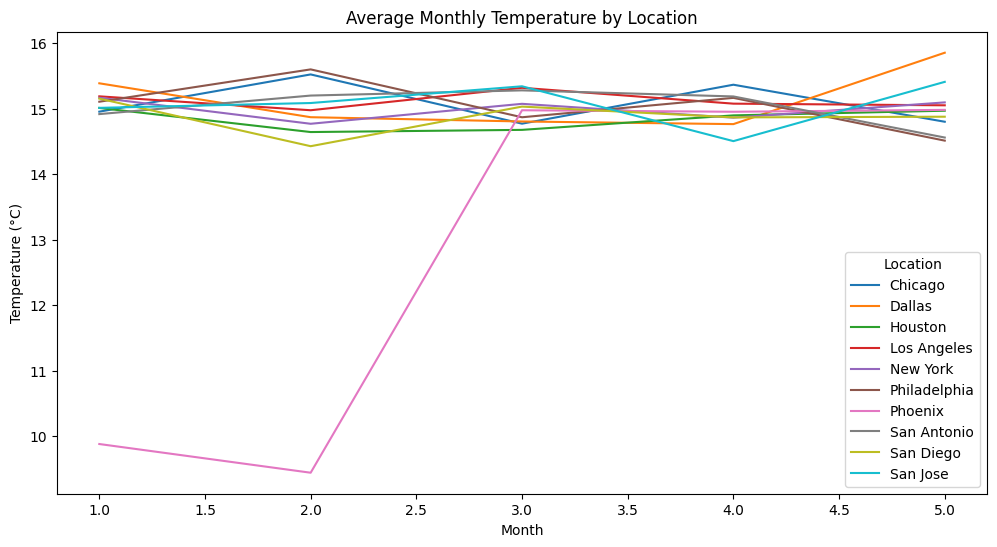

In [7]:
class WeatherDataAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None

    def load_data(self):
        """Load data from the specified CSV file."""
        self.df = pd.read_csv(self.file_path)
        print(self.df.head())
        print(self.df.info())

    def process_data(self):
        """Process data to extract necessary information."""
        # Convert Date_Time to datetime format
        self.df['Date_Time'] = pd.to_datetime(self.df['Date_Time'])
        # Extract month and year from Date_Time
        self.df['Month'] = self.df['Date_Time'].dt.month
        self.df['Year'] = self.df['Date_Time'].dt.year

    def calculate_monthly_avg_temp(self):
        """Calculate monthly average temperature for each location."""
        self.monthly_avg_temp = self.df.groupby(['Location', 'Year', 'Month'])['Temperature_C'].mean().reset_index()

    def plot_monthly_avg_temp(self):
        """Plot average monthly temperature for each location."""
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=self.monthly_avg_temp, x='Month', y='Temperature_C', hue='Location')
        plt.title('Average Monthly Temperature by Location')
        plt.xlabel('Month')
        plt.ylabel('Temperature (°C)')
        plt.legend(title='Location')
        plt.show()

# Example usage
if __name__ == "__main__":
    analyzer = WeatherDataAnalyzer('/content/weather_data.csv')
    analyzer.load_data()
    analyzer.process_data()
    analyzer.calculate_monthly_avg_temp()
    analyzer.plot_monthly_avg_temp()
